In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
# DATADIR="D:/Desktop/My_ML Project/Datasets/Train/Train_Set"
# CATEGORIES=["Angry","Contempt","Disgused","Afraid","Happy","Neutral","Sad","Surprised"]
# these two lines below are just for testing, uncomment the lines above for the actual training dataset
DATADIR="D:/Desktop/My_ML Project/Datasets/Evaluate"
CATEGORIES=["Happy","Angry","Disgused","Sad","Neutral","Surprised"]


for category in CATEGORIES:
    path=os.path.join(DATADIR,category) # path to cats or dogs category
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # IMREAD_GRAYSCALE to read images without colors
        #plt.imshow(img_array, cmap="gray") # these two lines are just to show the images
        #plt.show()

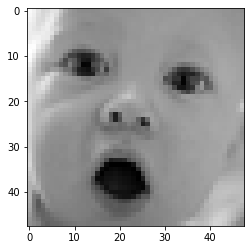

In [3]:
# nomalize data
#No need to execute this tab
IMG_SIZE=48 # Specify the size of your image
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # Resize your image (size,size)
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
# Creating training data
training_data=[]
IMG_SIZE=48
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category) # path to cats or dogs category
        class_num = CATEGORIES.index(category) # donner à chaque categorie un nombre selon son index dans le dossier
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # IMREAD_GRAYSCALE to read images without colors
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # Resize your image (size,size)
                training_data.append([new_array,class_num]) # add the picture to the training data list along with its index 
                #plt.imshow(img_array, cmap="gray") # these two kines are just to show the images
                #plt.show()
            except Exception as e:
                pass
create_training_data() # call the fonction to start training

In [6]:
print(len(training_data)) # how many elements are there in the dataset

3586


In [7]:
random.shuffle(training_data) # shuffle the data

In [11]:
X=[] # FEATURES
y=[] # labels
for features, label in training_data:
    X.append(features)
    y.append(label)
y = np.array(y) #transform the features into numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # reshape the features
                                                    #the 1 refers to gray, put 3 for colors

In [12]:
# Save your training_dataset

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
# train your model
        # open your training dataset
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

        # normalize data by scalling it
X=X/255.0        #we can aslo use keras.normalize()
        # strat building our model
model=Sequential()

# first layer
model.add(Conv2D(64,(3,3), input_shape=X.shape[1:])) # first convenential layer conv2D(64,Window,)
                                                      # the first parametre can be modified, search for it
model.add(Activation("relu")) # an activation layer with the function "relu"
model.add(MaxPooling2D(pool_size=(2,2)))  # MaxPooling2D layer

# second layer        
model.add(Conv2D(64,(3,3))) # second convenential layer conv2D(64,Window,)
model.add(32,Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 
          
# A Dense layer      
model.add(Flatten()) # flatten the data before the dense layer
model.add(Dense(64))
model.add(Activation("relu"))
          
model.add(Dense(1))
model.add(Activation('sigmoid')) # an activation layer with the function 'Sigmoid'
          
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy']) # for the loss we used this function because we have two categories only
          # if you have many categories, use 'categorical_crossentropy' !!!!!!!!!!!
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.2, shuffle=True) # fit your model with X and y, for the batch_size shoose it according to the size of your data
                              #epochs: how many time our model will be trained with the same data, increase it for more accuracy, validation_split=0.1 to split the data into a training set of 90% and a testing set of 10%
                            #The validation_split argument should be a float between 0 and 1, representing the fraction of the training data to use as validation data. For example, if you pass 0.2 to validation_split, 20% of the training data will be used as validation data and the remaining 80% will be used as training data.

Epoch 1/3
90/90 [==============================] - 132s 1s/step - loss: -1065228.3750 - accuracy: 0.1328 - val_loss: -8174932.0000 - val_accuracy: 0.1365
Epoch 2/3
90/90 [==============================] - 131s 1s/step - loss: -58505472.0000 - accuracy: 0.1287 - val_loss: -203636992.0000 - val_accuracy: 0.1365
Epoch 3/3
90/90 [==============================] - 131s 1s/step - loss: -520701024.0000 - accuracy: 0.1287 - val_loss: -1307416960.0000 - val_accuracy: 0.1365


In [18]:
print("the accuracy is 12.87%")

the accuracy is 12.87%
